In [1]:
library(fda)

Loading required package: splines
Loading required package: Matrix
Loading required package: fds
Loading required package: rainbow
Loading required package: MASS
Loading required package: pcaPP
Loading required package: RCurl

Attaching package: ‘fda’

The following object is masked from ‘package:graphics’:

    matplot



[1] 0.888 0.778 0.377 0.219 0.132 0.003

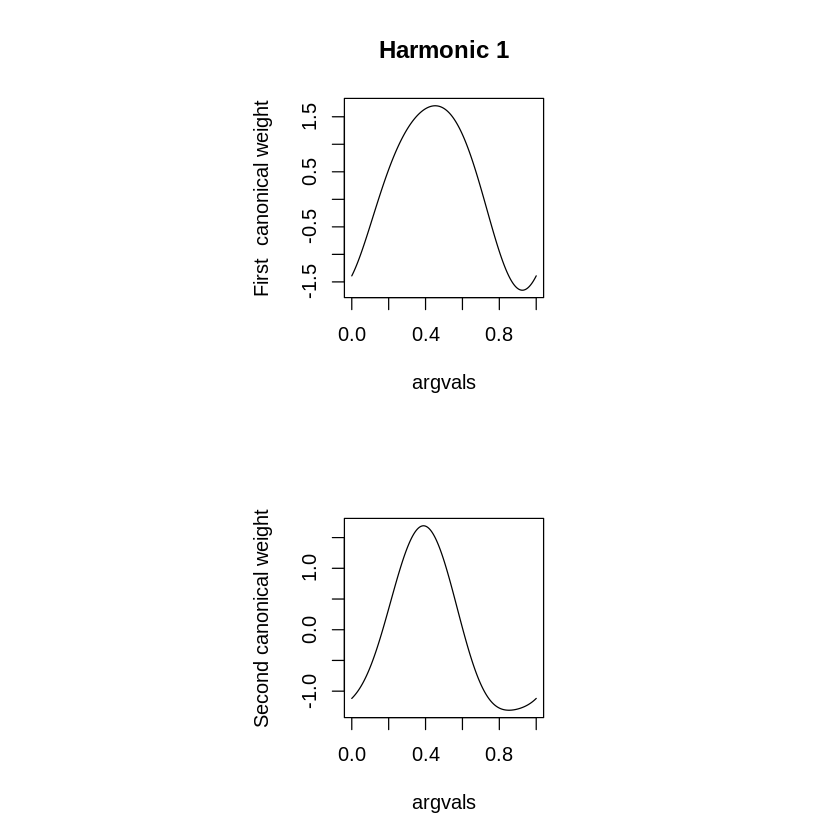

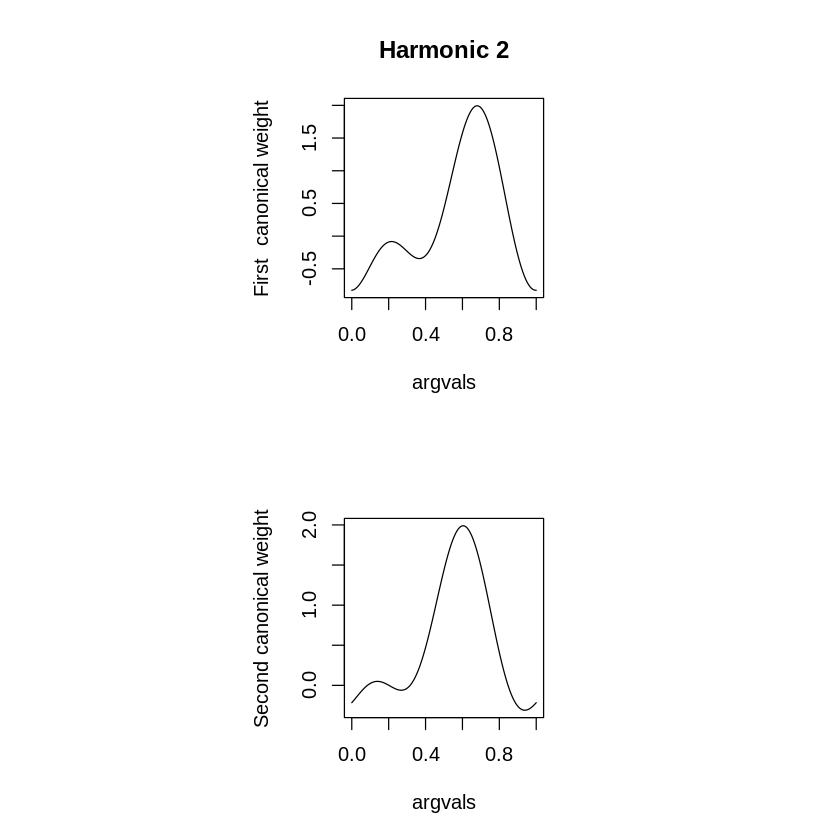

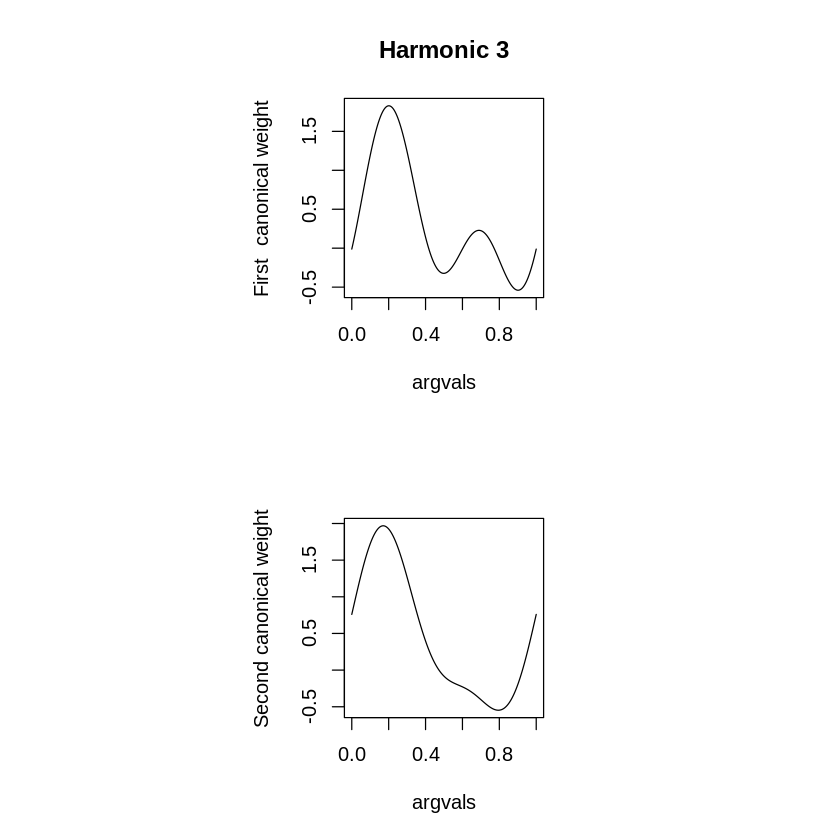

In [107]:
#  Canonical correlation analysis of knee-hip curves

gaittime  <- (1:20)/21
gaitrange <- c(0,1)
gaitbasis <- create.fourier.basis(gaitrange,21)
lambda    <- 10^(-11.5)
harmaccelLfd <- vec2Lfd(c(0, 0, (2*pi)^2, 0))

                    #gait basis, differential operator, smoothing value
gaitfdPar <- fdPar(gaitbasis, harmaccelLfd, lambda)
gaitfd <- smooth.basis(gaittime, gait, gaitfdPar)$fd

#           basis function, ? 
ccafdPar <- fdPar(gaitfd, harmaccelLfd, 1e-8)
ccafd0    <- cca.fd(gaitfd[,1], gaitfd[,2], ncan=3, ccafdPar, ccafdPar)
#ccafd0    <- cca.fd(gaitfd[,1], gaitfd[,2], ncan=3, ccafdPar, ccafdPar)
#  display the canonical correlations
round(ccafd0$ccacorr[1:6],3)
#  compute a VARIMAX rotation of the canonical variables
ccafd <- varmx.cca.fd(ccafd0)
#  plot the canonical weight functions
plot.cca.fd(ccafd)

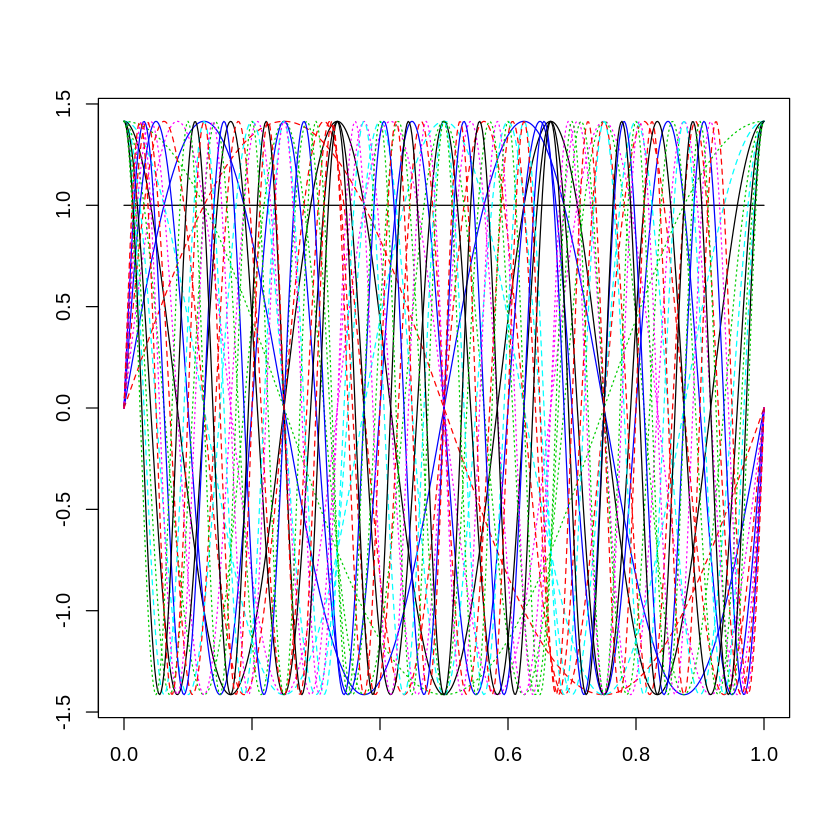

In [99]:
plot(gaitbasis)


In [106]:
# NOT RUN {
##
## Simple example
##
#  set up range for density
rangeval <- c(-3,3)
#  set up some standard normal data
x <- rnorm(50)
#  make sure values within the range
x[x < -3] <- -2.99
x[x >  3] <-  2.99
#  set up basis for W(x)
basisobj <- create.bspline.basis(rangeval, 11)
#  set up initial value for Wfdobj
Wfd0 <- fd(matrix(0,11,1), basisobj)
WfdParobj <- fdPar(Wfd0)

WfdP3 <- fdPar(seq(-3, 3, length=11))

##
##  smooth the Canadian daily temperature data
##
#    set up the fourier basis
nbasis   <- 365
dayrange <- c(0,365)
daybasis <- create.fourier.basis(dayrange, nbasis)
dayperiod <- 365
harmaccelLfd <- vec2Lfd(c(0,(2*pi/365)^2,0), dayrange)
#  Make temperature fd object
#  Temperature data are in 12 by 365 matrix tempav
#    See analyses of weather data.
#  Set up sampling points at mid days
daytime  <- (1:365)-0.5
#  Convert the data to a functional data object
daybasis65 <- create.fourier.basis(dayrange, nbasis, dayperiod)
templambda <- 1e1
tempfdPar  <- fdPar(fdobj=daybasis65, Lfdobj=harmaccelLfd,
                    lambda=templambda)

#FIXME
#tempfd <- smooth.basis(CanadianWeather$tempav, daytime, tempfdPar)$fd
#  Set up the harmonic acceleration operator
Lbasis  <- create.constant.basis(dayrange);
Lcoef   <- matrix(c(0,(2*pi/365)^2,0),1,3)
bfdobj  <- fd(Lcoef,Lbasis)
bwtlist <- fd2list(bfdobj)
harmaccelLfd <- Lfd(3, bwtlist)
#  Define the functional parameter object for
#  smoothing the temperature data
lambda   <- 0.01  #  minimum GCV estimate
#tempPar <- fdPar(daybasis365, harmaccelLfd, lambda)
#  smooth the data
#tempfd <- smooth.basis(daytime, CanadialWeather$tempav, tempPar)$fd
#  plot the temperature curves
#plot(tempfd)

##
## with rangeval of class Date and POSIXct
##


# }